In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Paths
leiden = os.path.join(os.getcwd(), 'input/CRC-097_clean_cylinter_clustering_3d_leiden.parquet')
hdbscan = os.path.join(os.getcwd(), 'input/CRC-097_clean_cylinter_clustering_3d_hdbscan.parquet')
main = os.path.join(os.getcwd(), 'input/main.csv')

out = os.path.join(os.getcwd(), 'output/3d_umap_clusters')
if not os.path.exists(out):
    os.makedirs(out)

VAE9 cluster 0


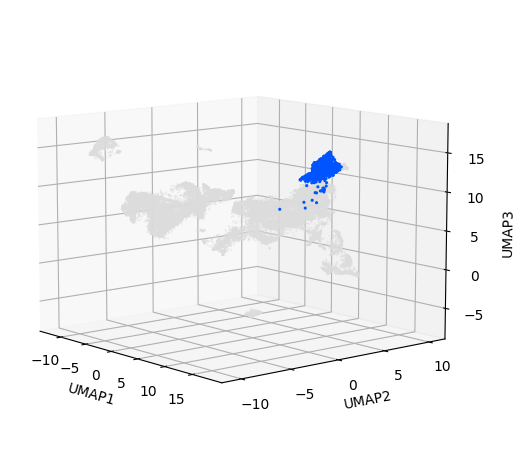

VAE9 cluster 1


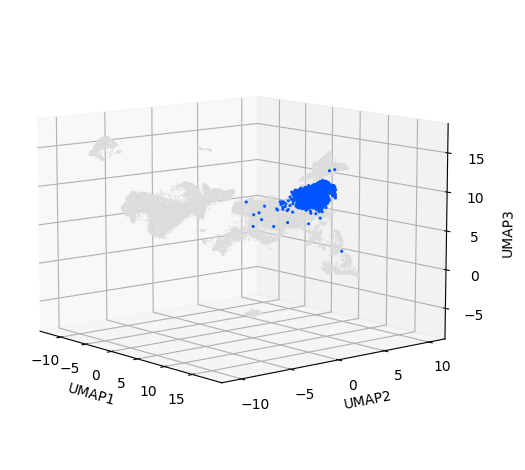

VAE9 cluster 2


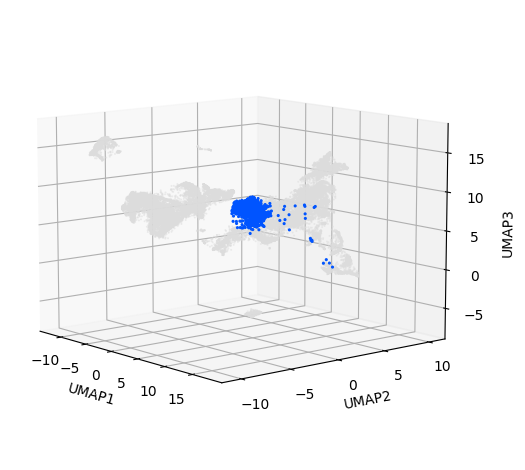

VAE9 cluster 3


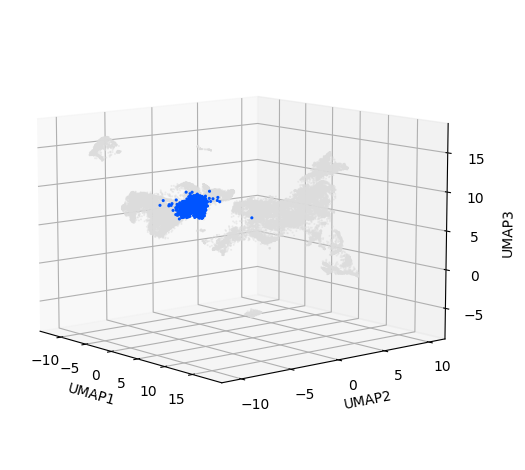

VAE9 cluster 4


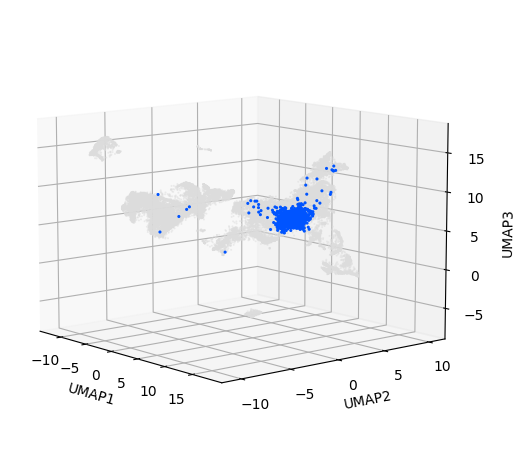

VAE9 cluster 5


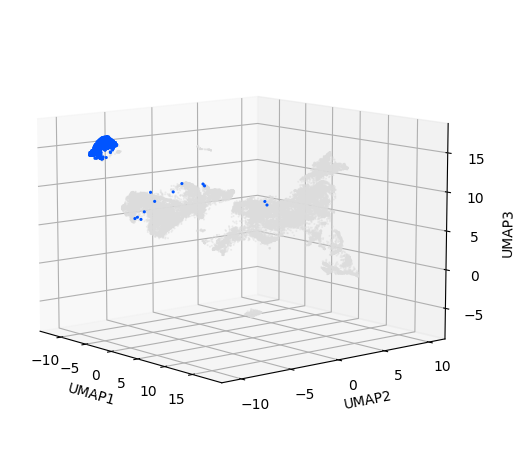

VAE9 cluster 6


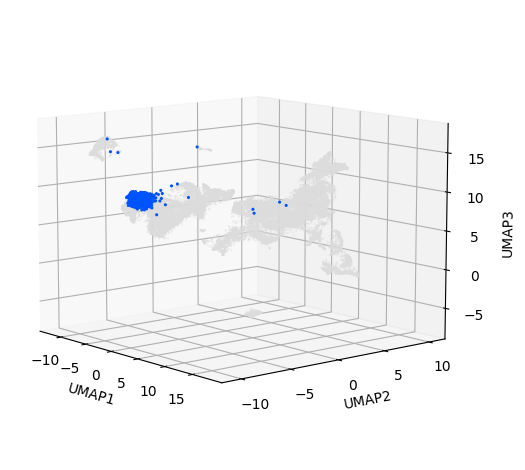

VAE9 cluster 7


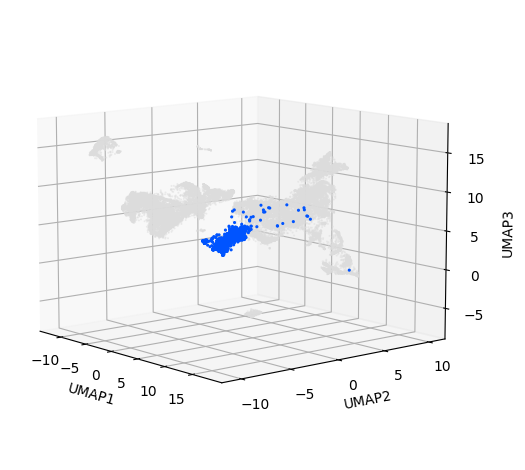

VAE9 cluster 8


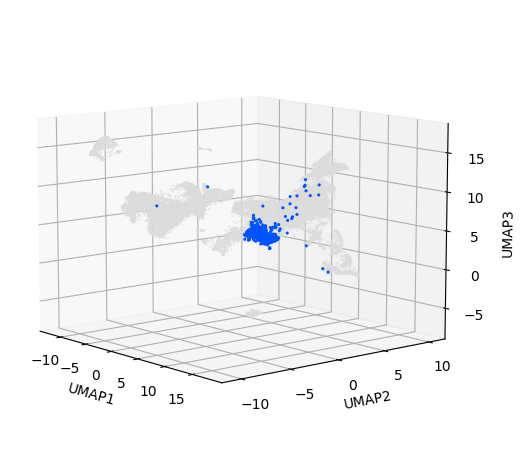

VAE9 cluster 9


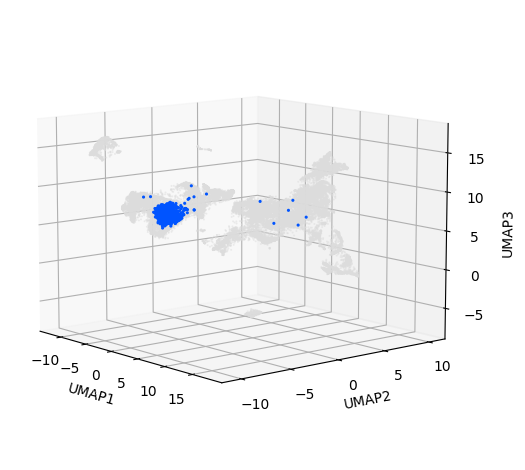

VAE9 cluster 10


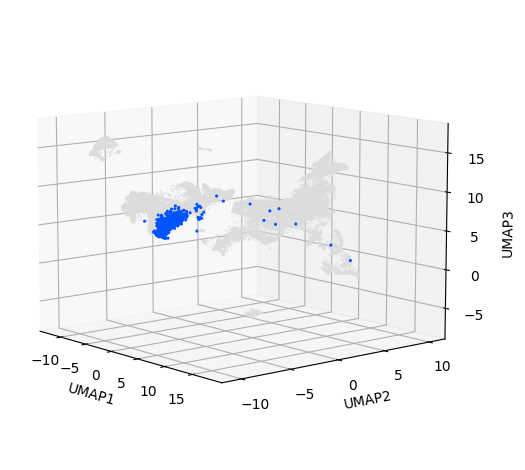

VAE9 cluster 11


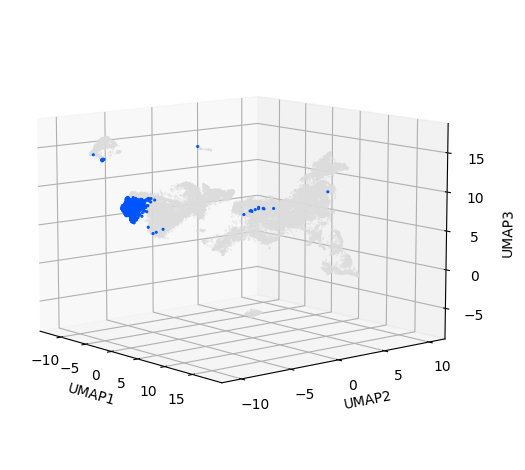

VAE9 cluster 12


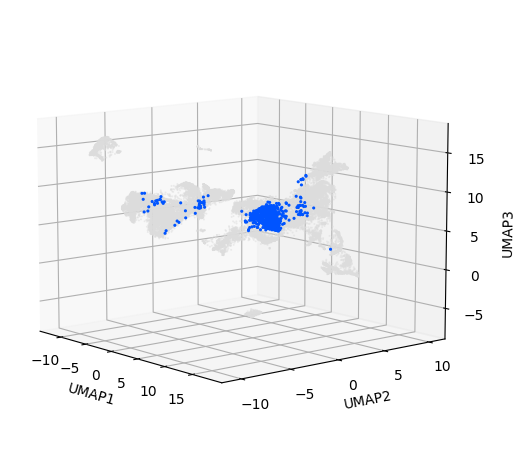

VAE9 cluster 13


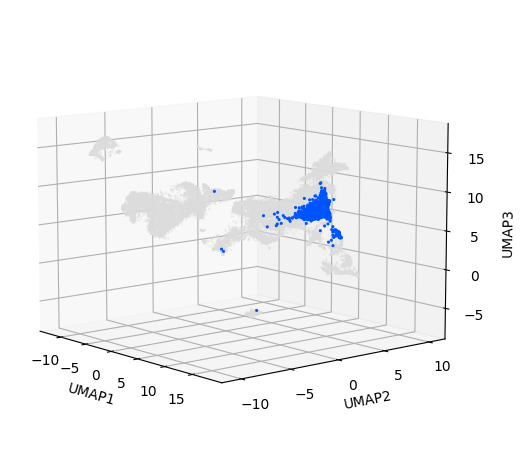

VAE9 cluster 14


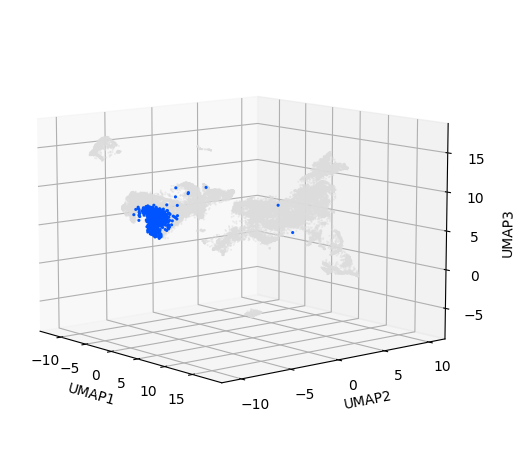

VAE9 cluster 15


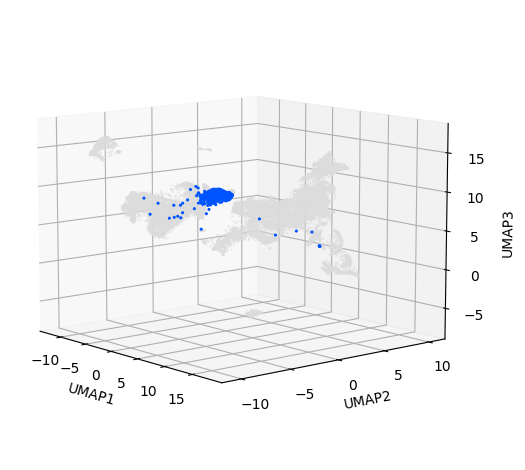

VAE9 cluster 16


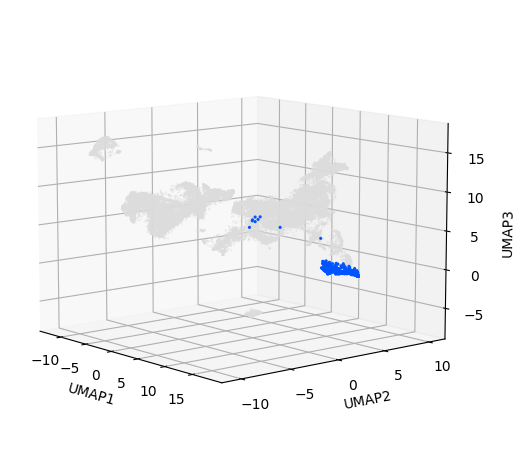

VAE9 cluster 17


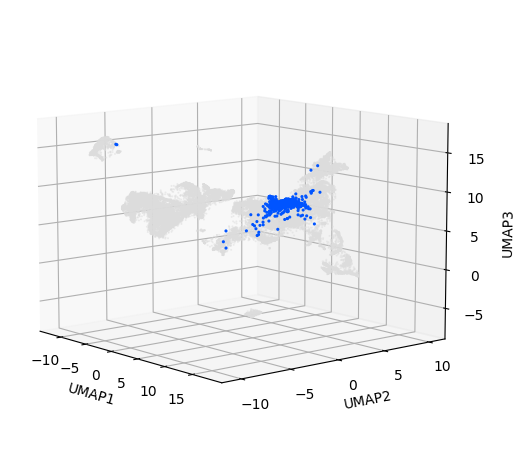

VAE9 cluster 18


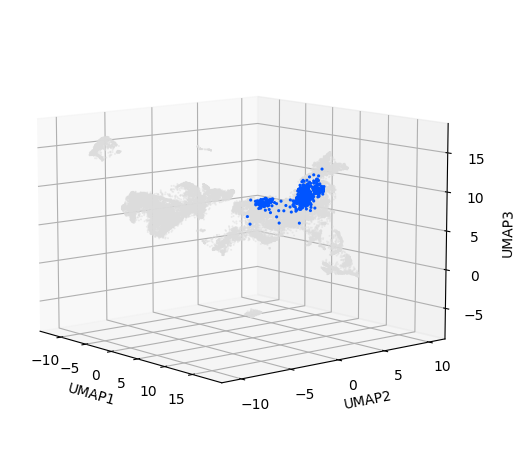

VAE9 cluster 19


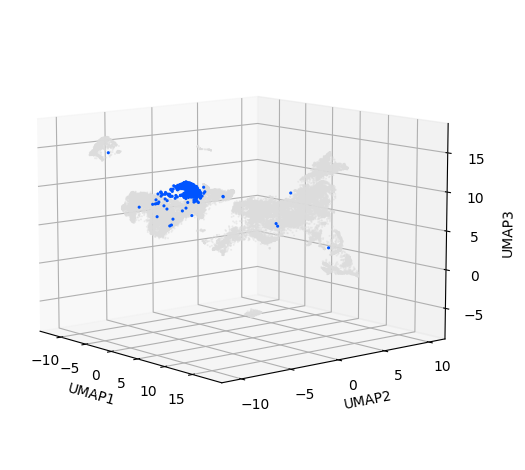

VAE9 cluster 20


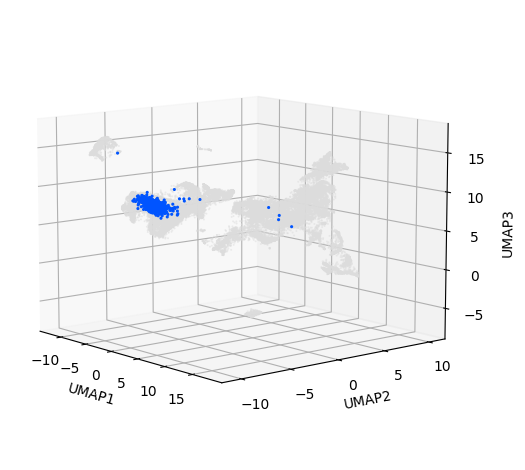

VAE9 cluster 21


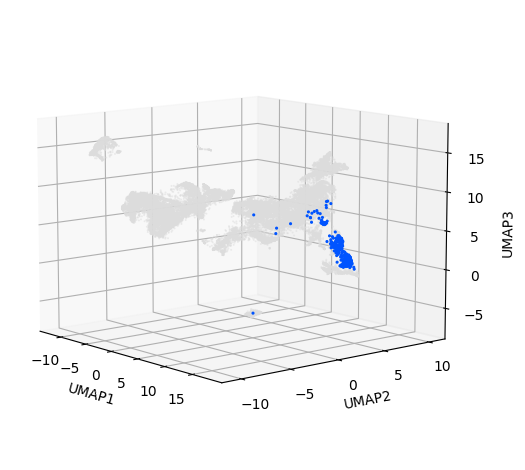

VAE9 cluster 22


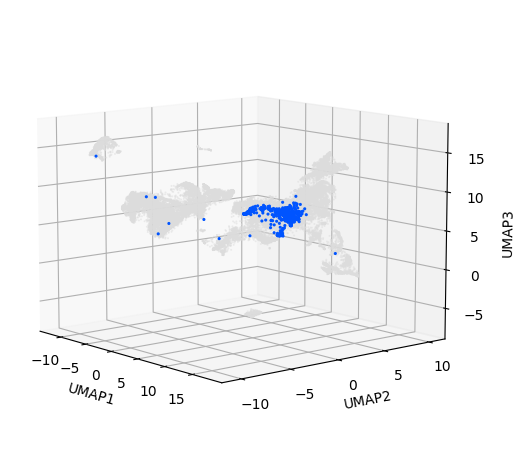

VAE9 cluster 23


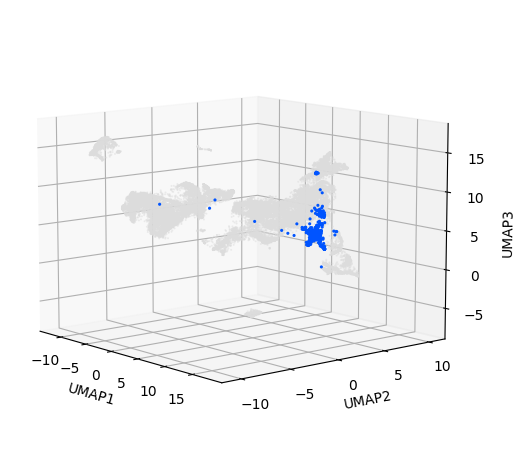

VAE9 cluster 24


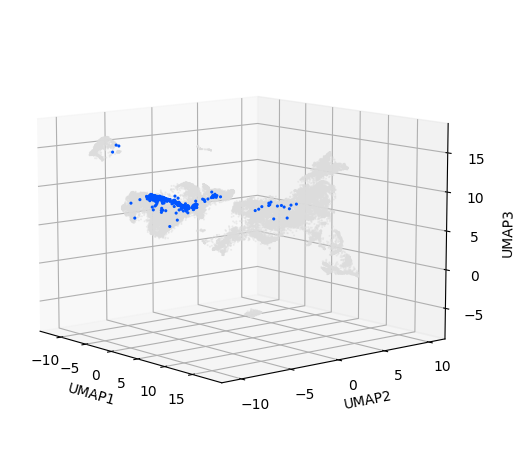

VAE9 cluster 25


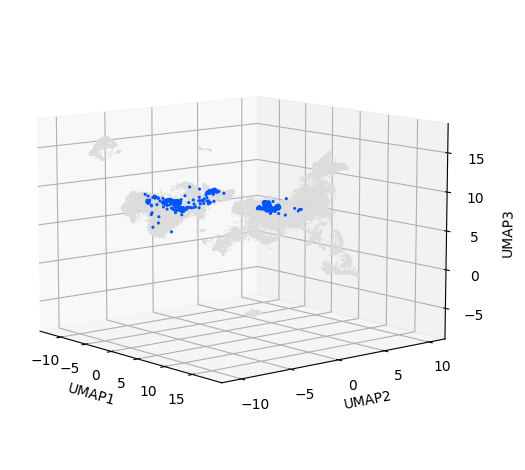

VAE9 cluster 26


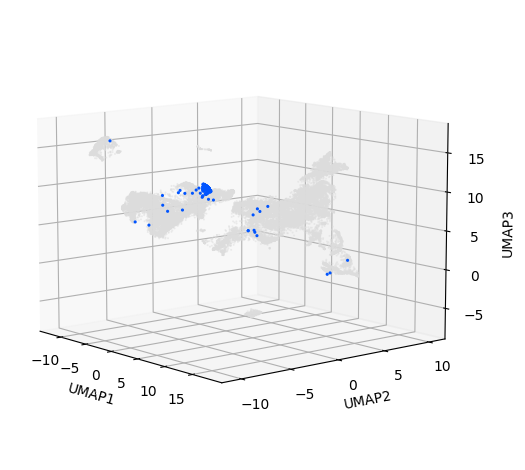

VAE9 cluster 27


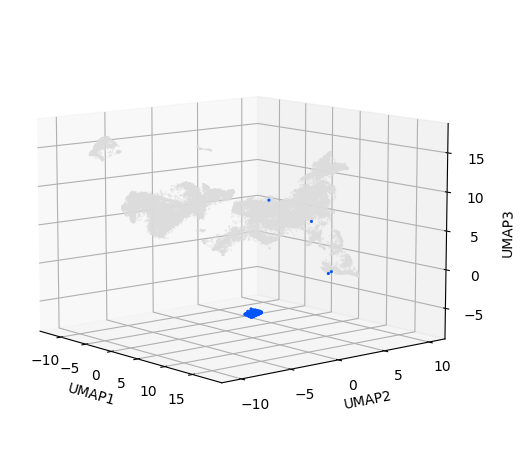

VAE9 cluster 28


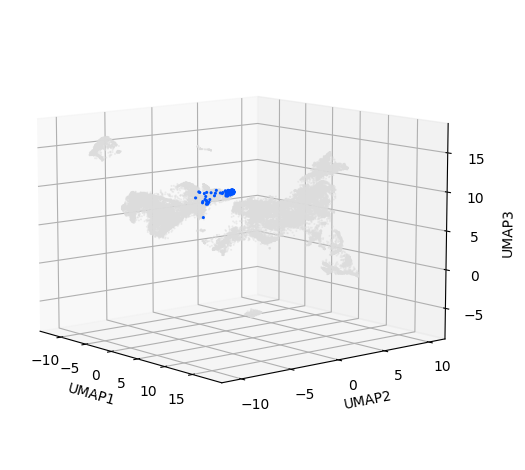

VAE9 cluster 29


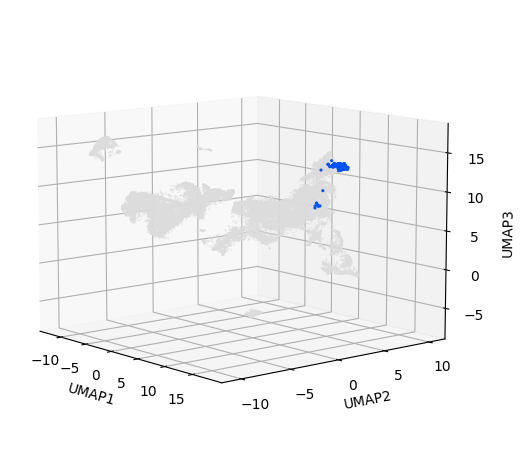

VAE9 cluster 30


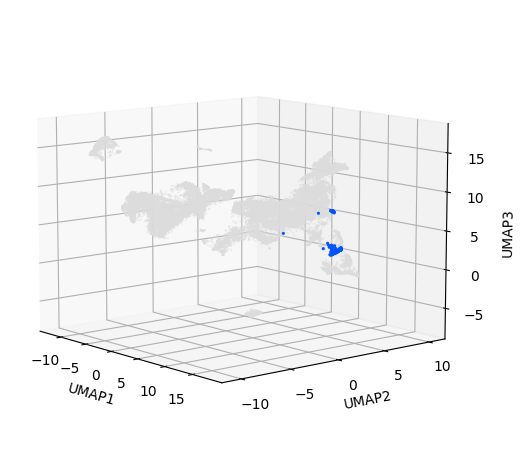

VAE9 cluster 31


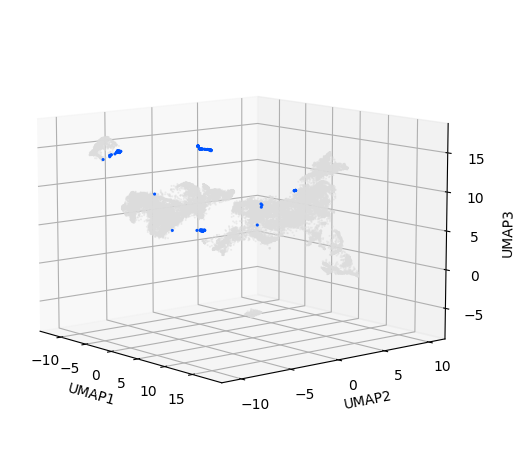

VAE20 cluster 0


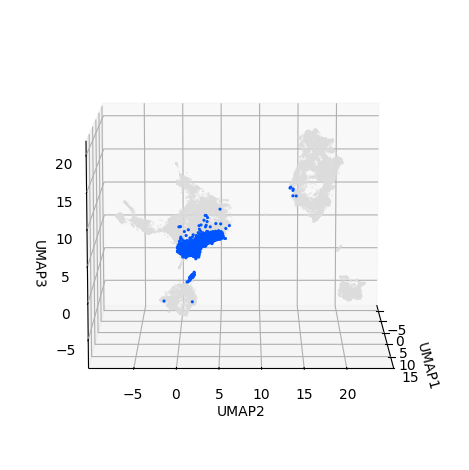

VAE20 cluster 1


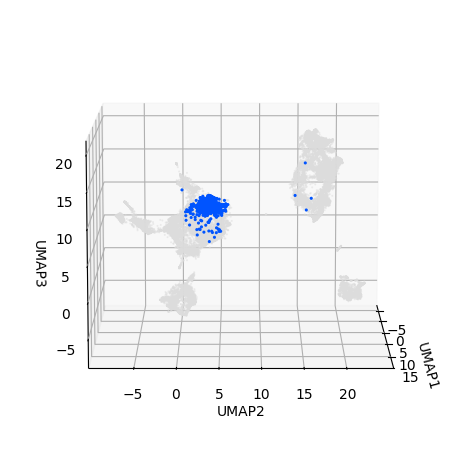

VAE20 cluster 2


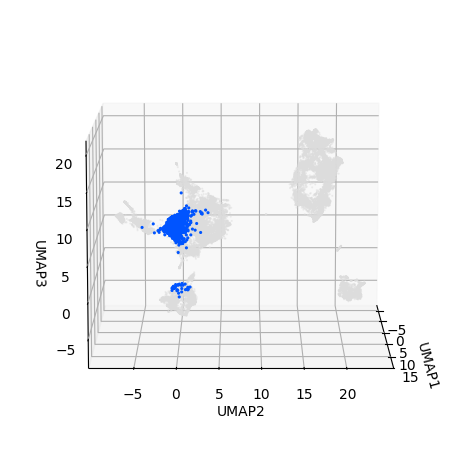

VAE20 cluster 3


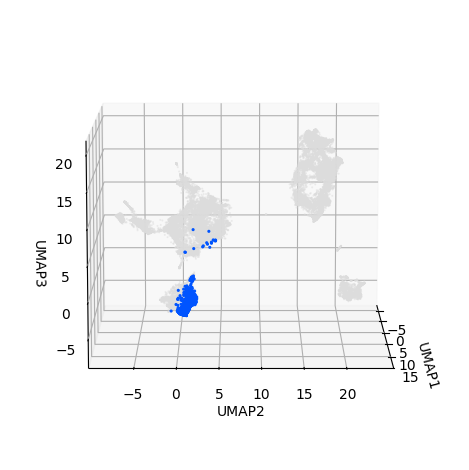

VAE20 cluster 4


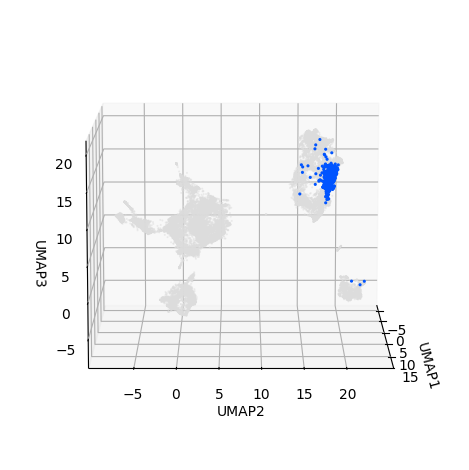

VAE20 cluster 5


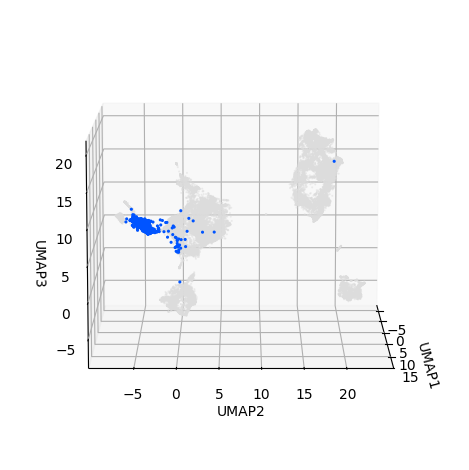

VAE20 cluster 6


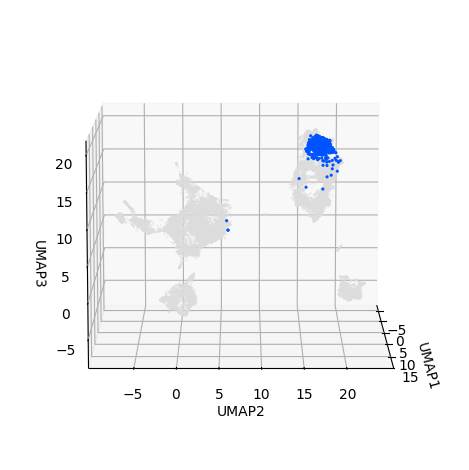

VAE20 cluster 7


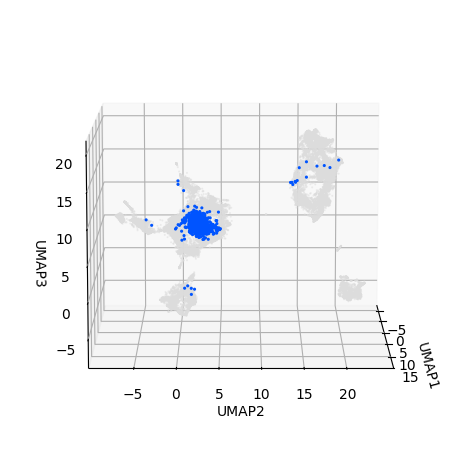

VAE20 cluster 8


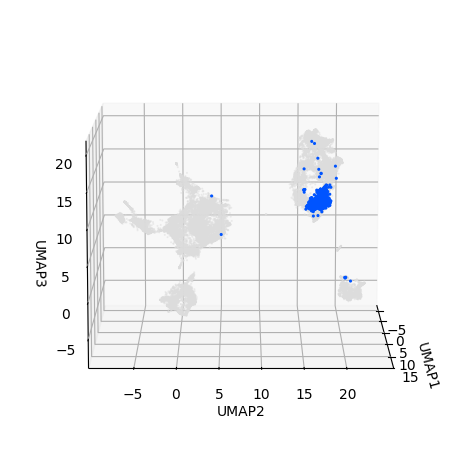

VAE20 cluster 9


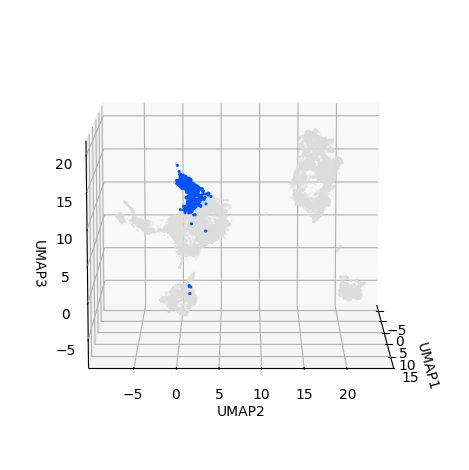

VAE20 cluster 10


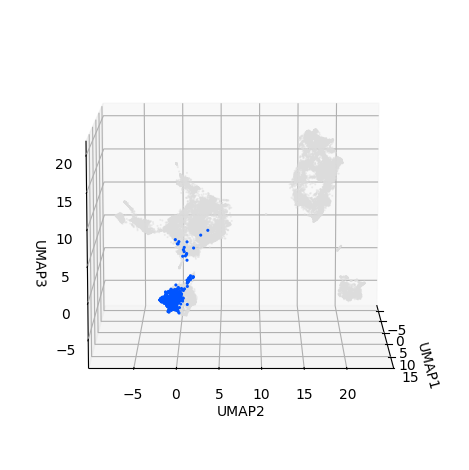

VAE20 cluster 11


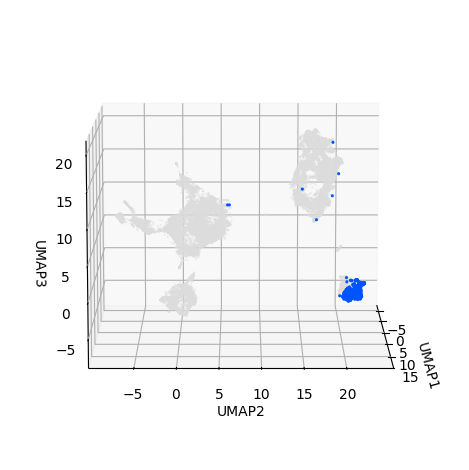

VAE20 cluster 12


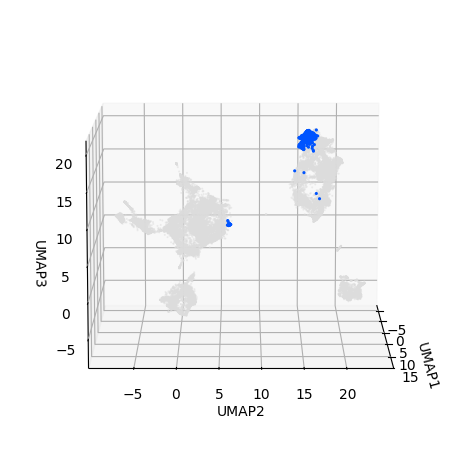

VAE20 cluster 13


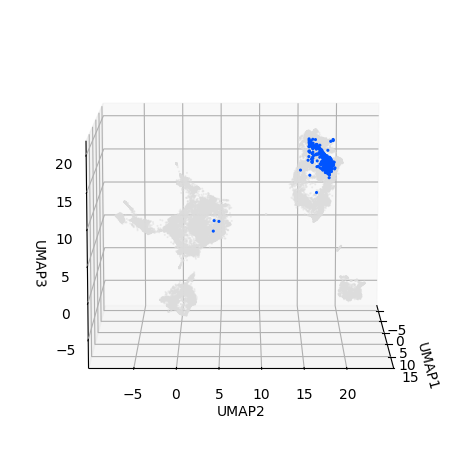

VAE20 cluster 14


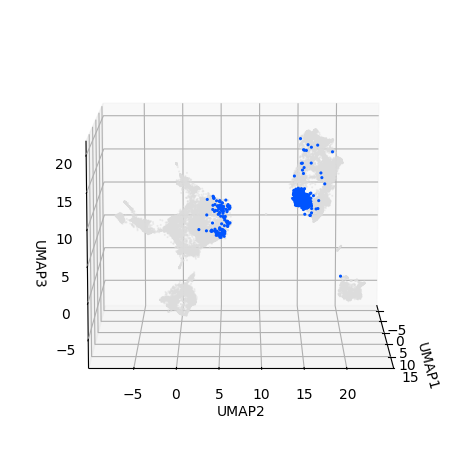

VAE20 cluster 15


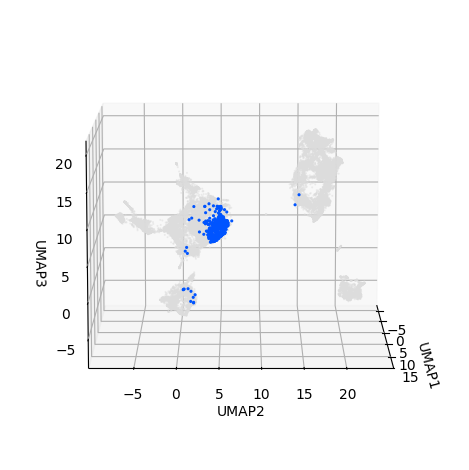

VAE20 cluster 16


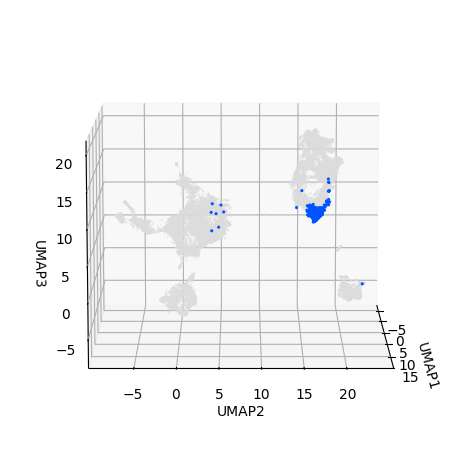

VAE20 cluster 17


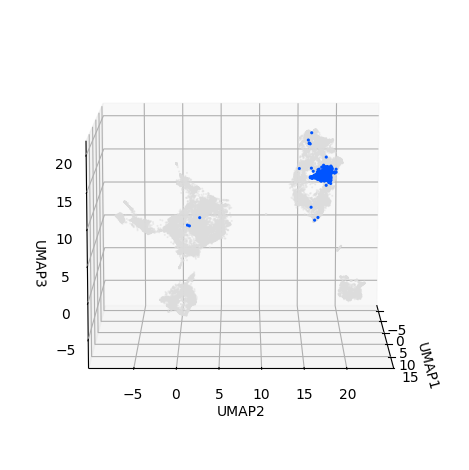

VAE20 cluster 18


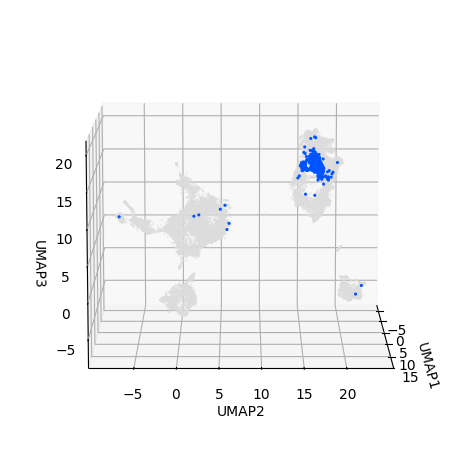

VAE20 cluster 19


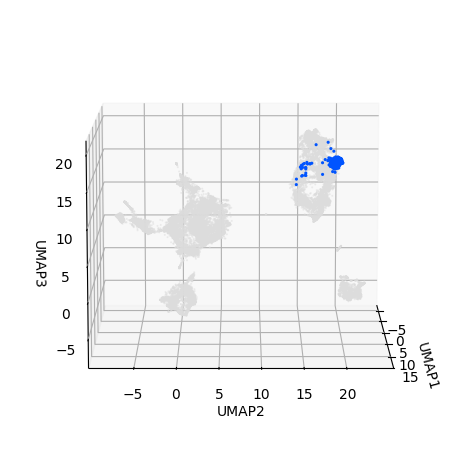

VAE20 cluster 20


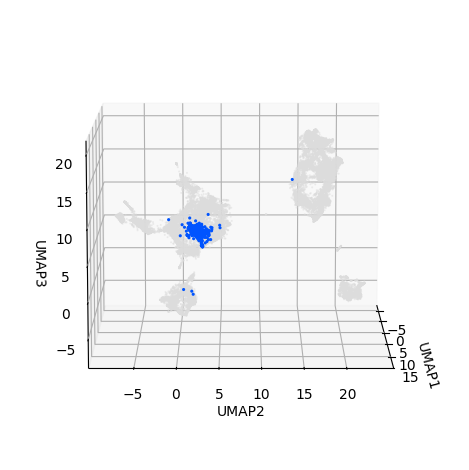

VAE20 cluster 21


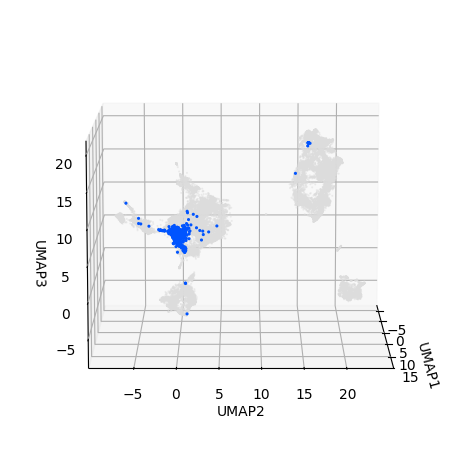

VAE20 cluster 22


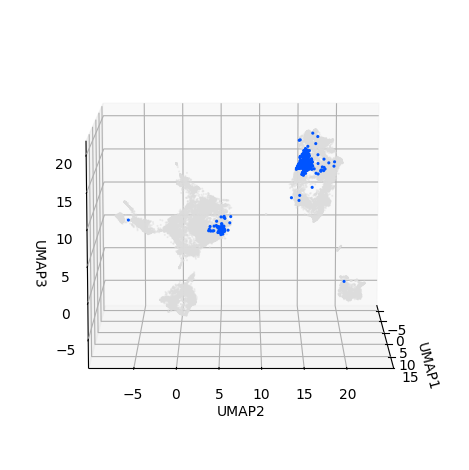

VAE20 cluster 23


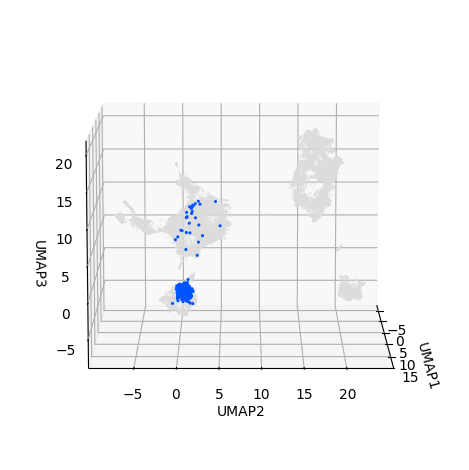

VAE20 cluster 24


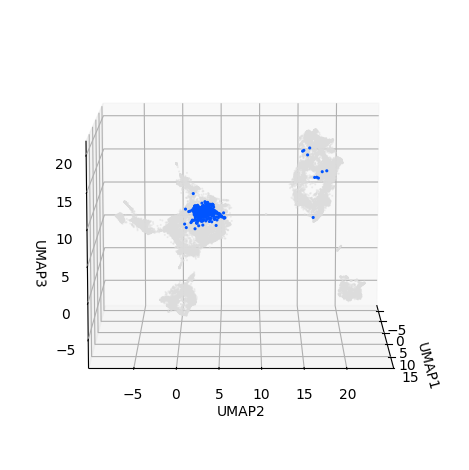

VAE20 cluster 25


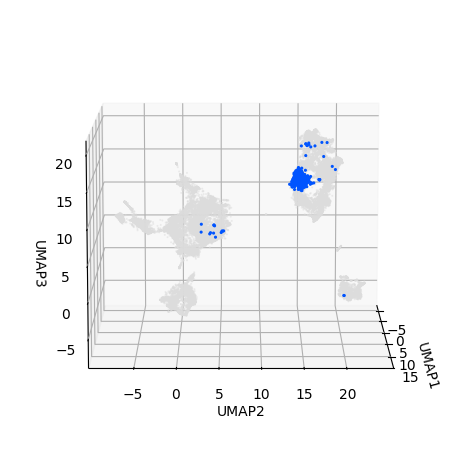

VAE20 cluster 26


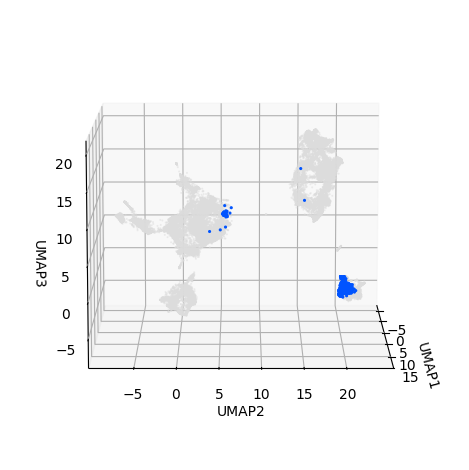

VAE20 cluster 27


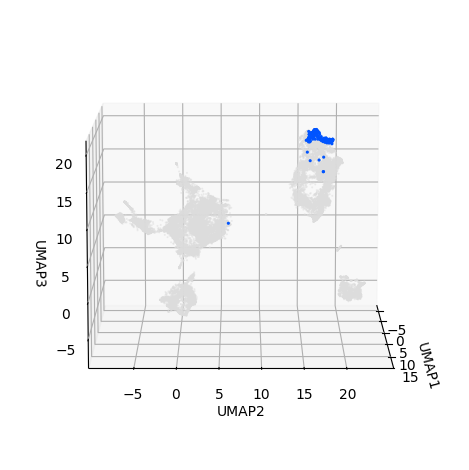

VAE20 cluster 28


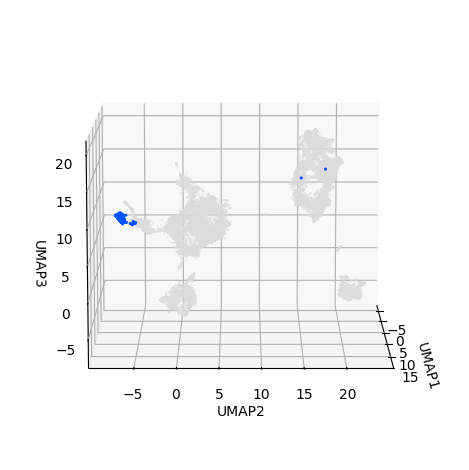

VAE20 cluster 29


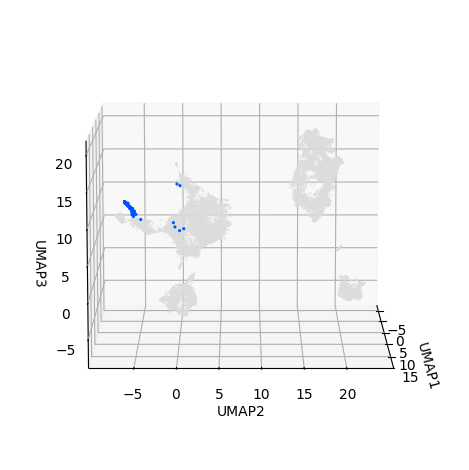

VAE20 cluster 30


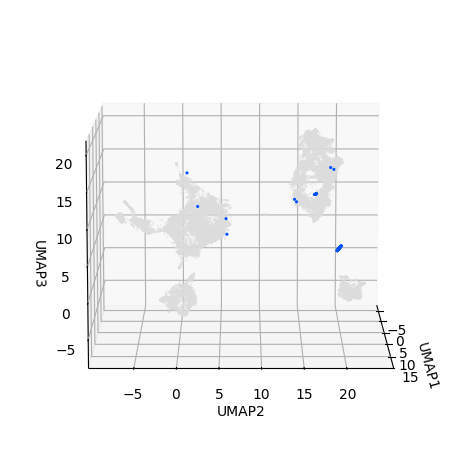

VAE20 cluster 31


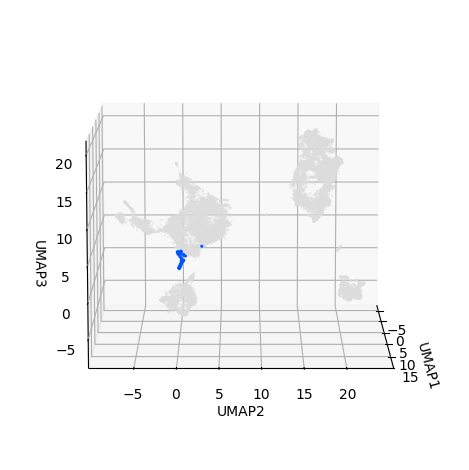

VAE20 cluster 32


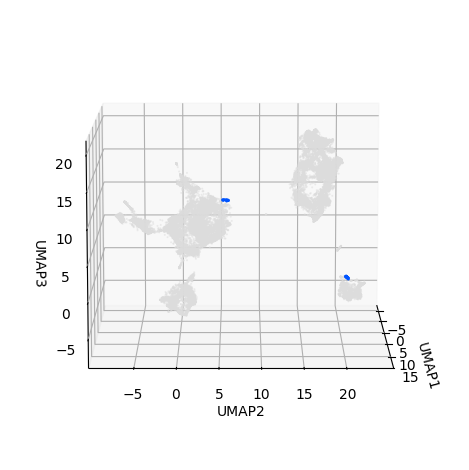

VAE20 cluster 33


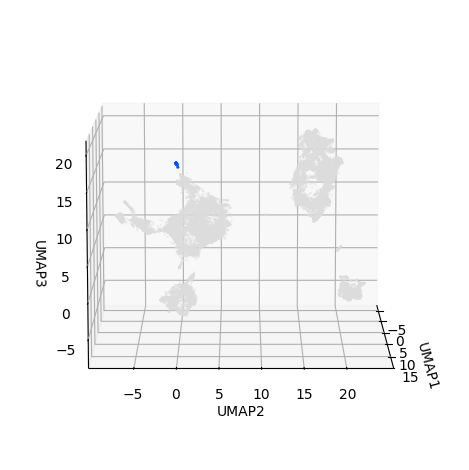

VAE20 cluster 34


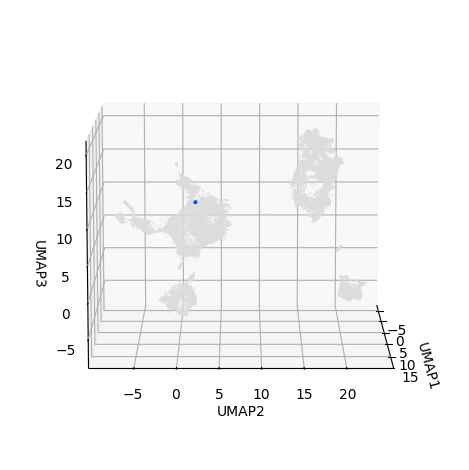

VAE20 cluster 35


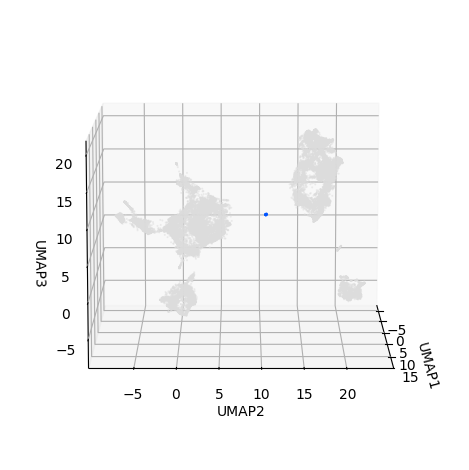

Leiden cluster 0


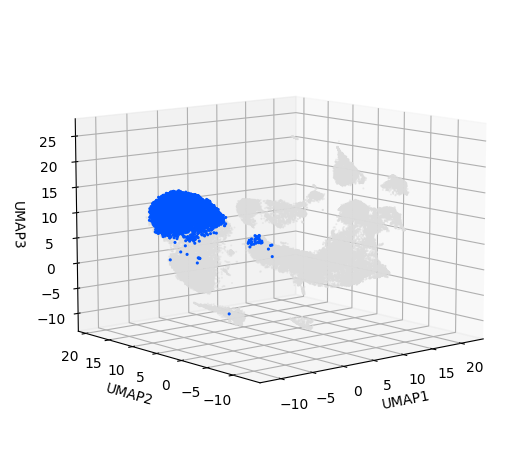

Leiden cluster 1


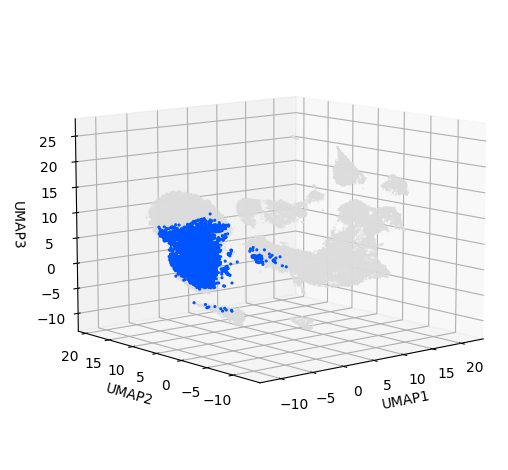

Leiden cluster 2


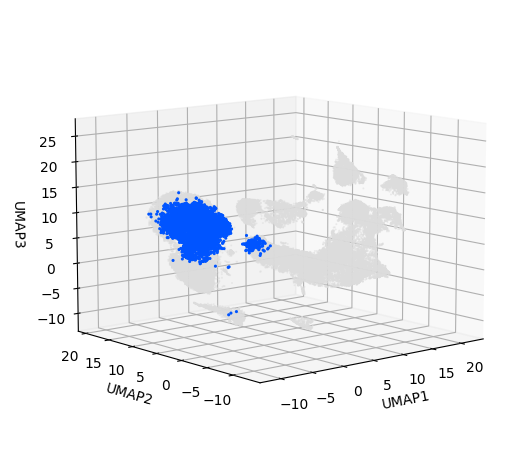

Leiden cluster 3


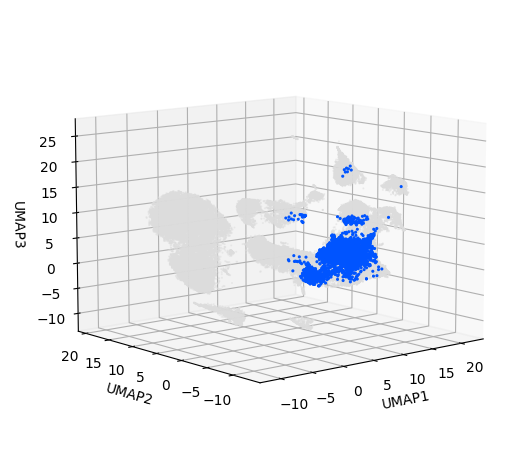

Leiden cluster 4


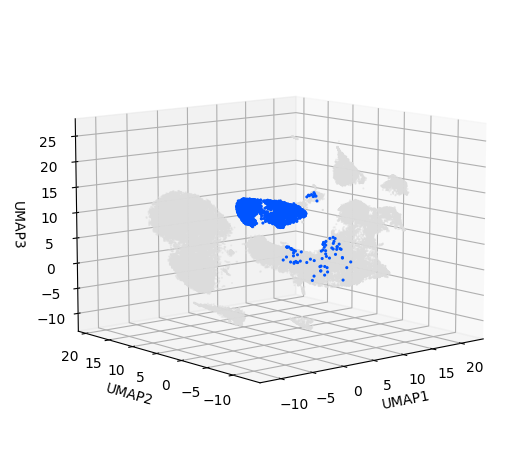

Leiden cluster 5


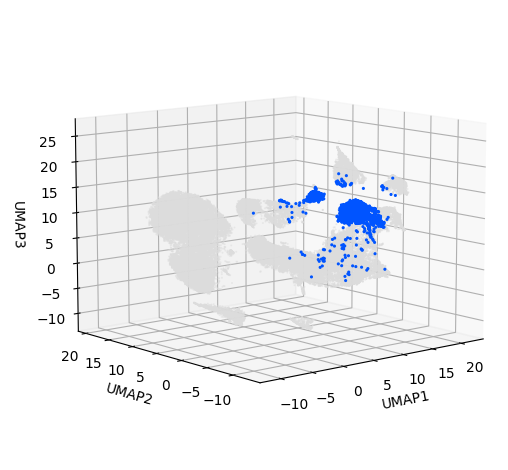

Leiden cluster 6


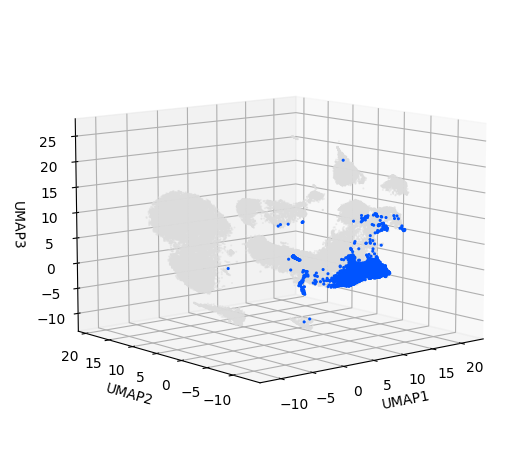

Leiden cluster 7


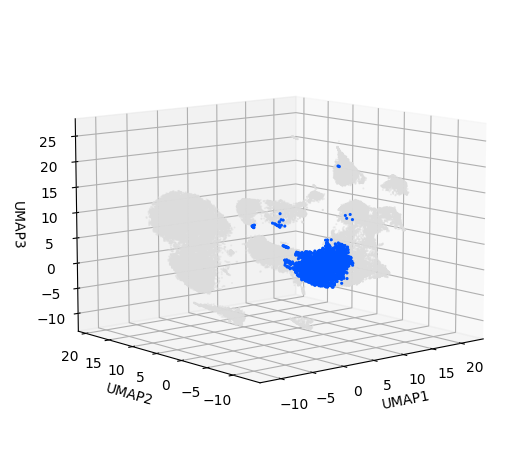

Leiden cluster 8


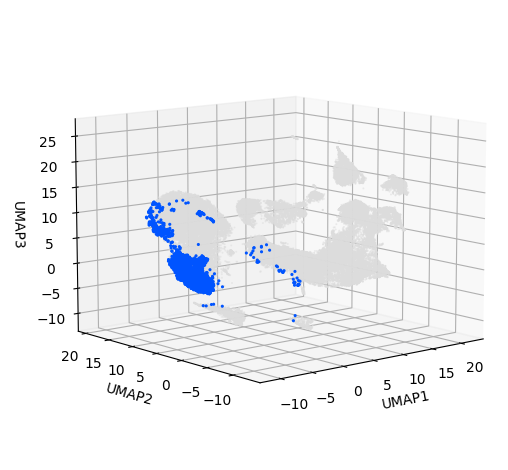

Leiden cluster 9


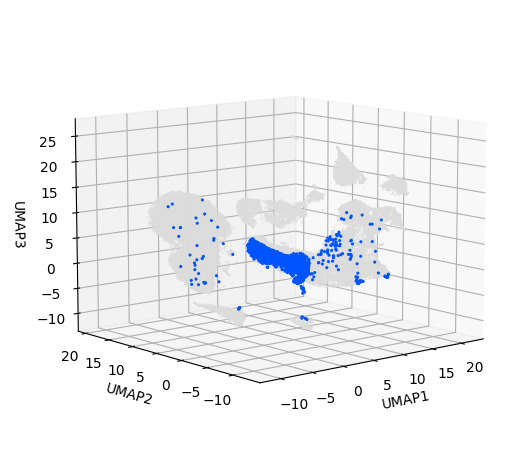

Leiden cluster 10


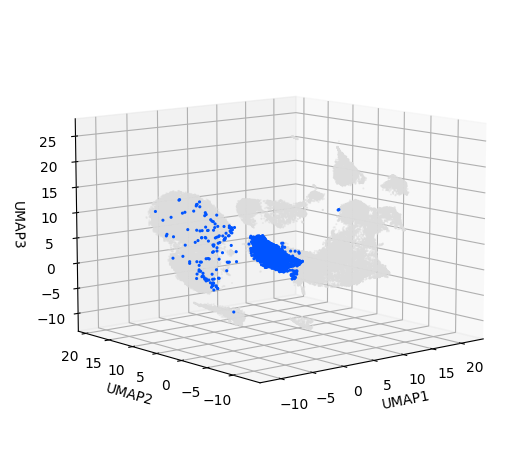

Leiden cluster 11


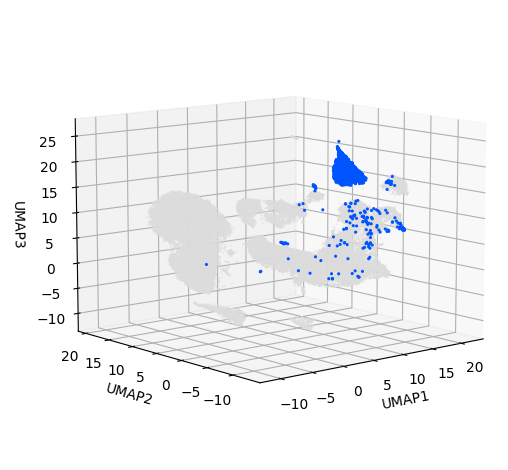

Leiden cluster 12


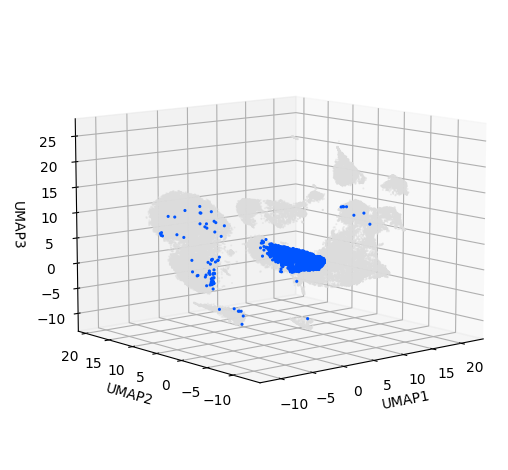

Leiden cluster 13


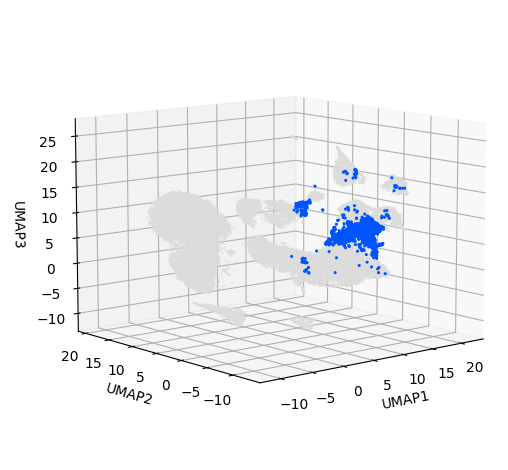

Leiden cluster 14


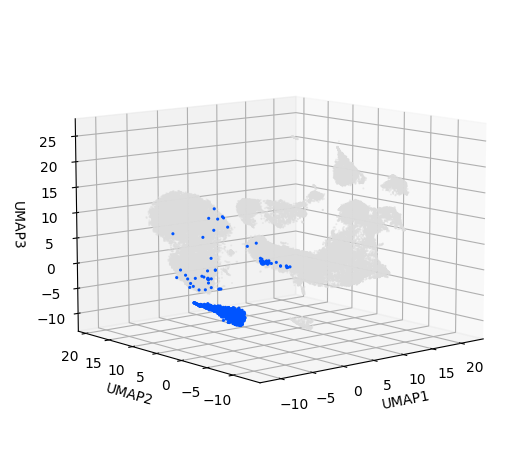

Leiden cluster 15


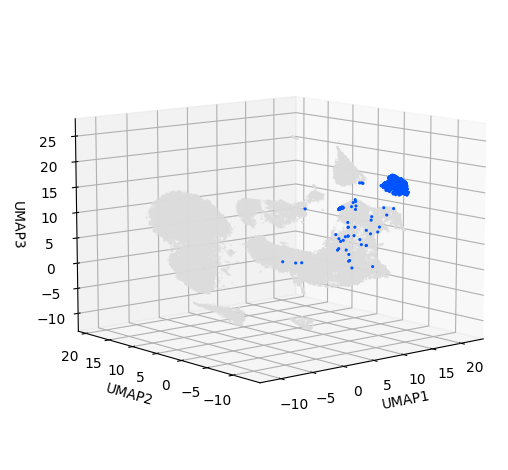

Leiden cluster 16


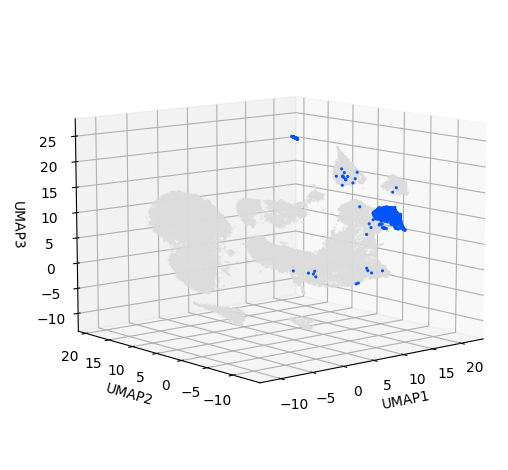

Leiden cluster 17


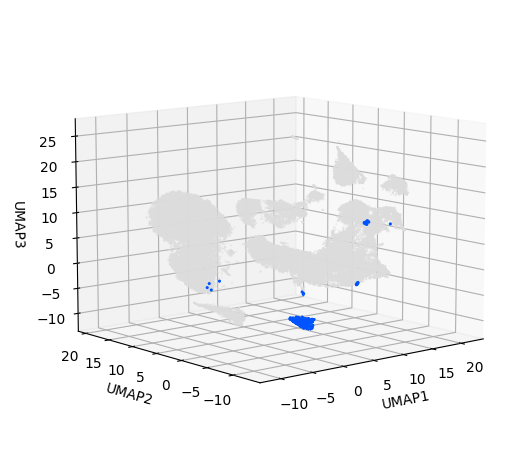

Leiden cluster 18


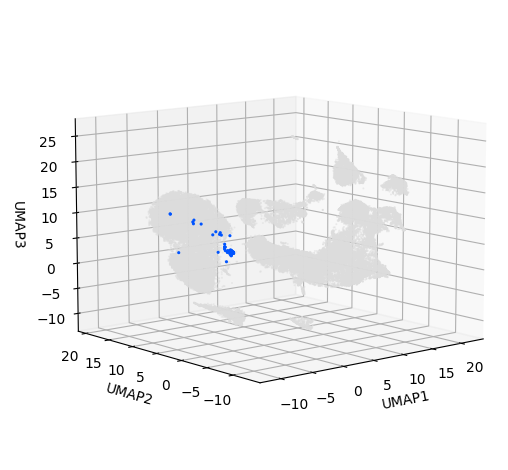

HDBSCAN cluster 0


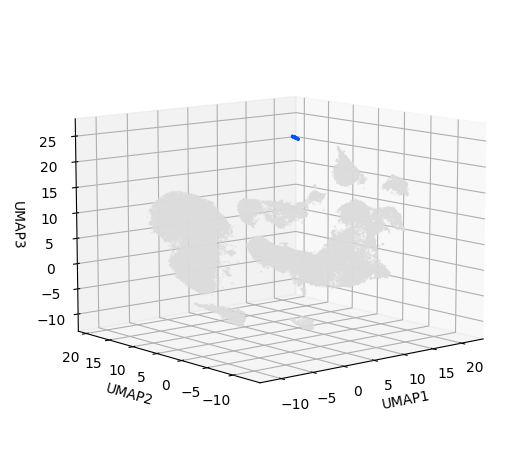

HDBSCAN cluster 1


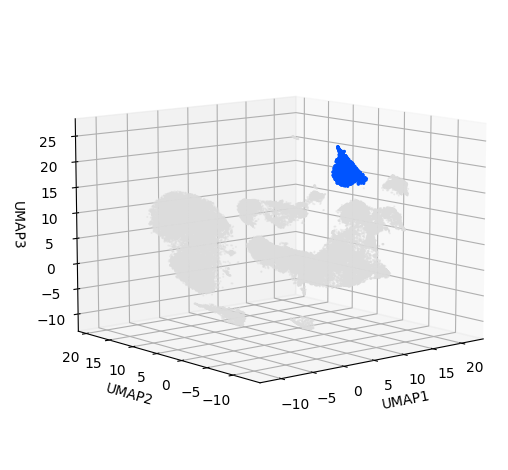

HDBSCAN cluster 2


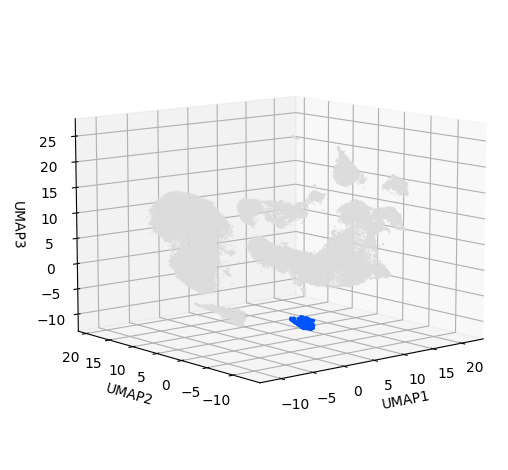

HDBSCAN cluster 3


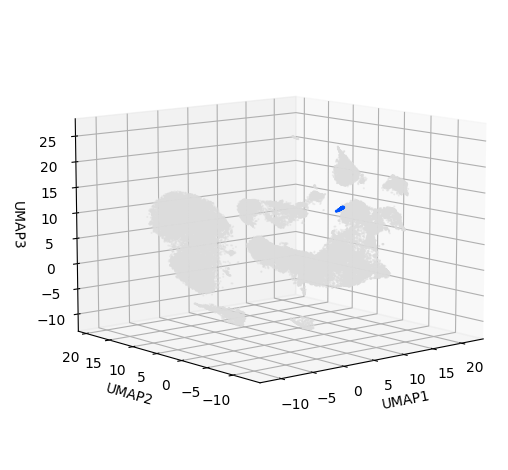

HDBSCAN cluster 4


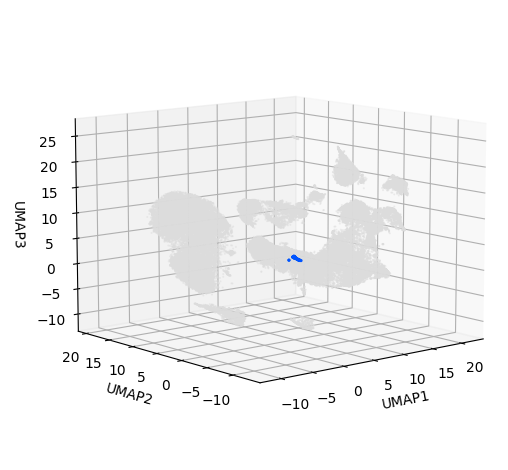

HDBSCAN cluster 5


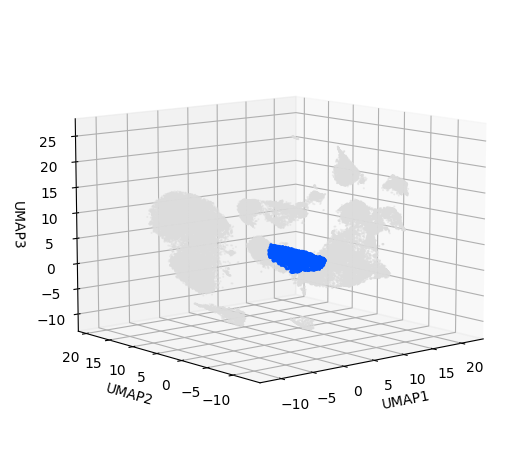

HDBSCAN cluster 6


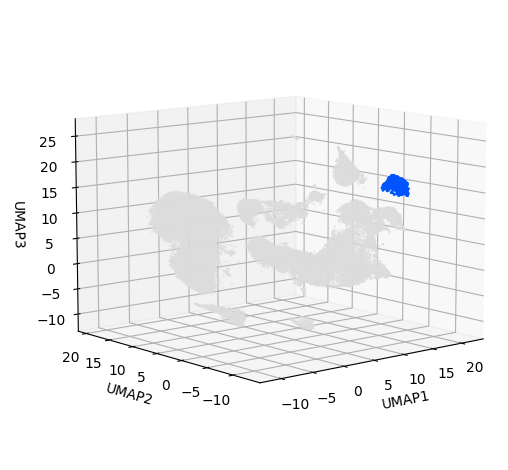

HDBSCAN cluster 7


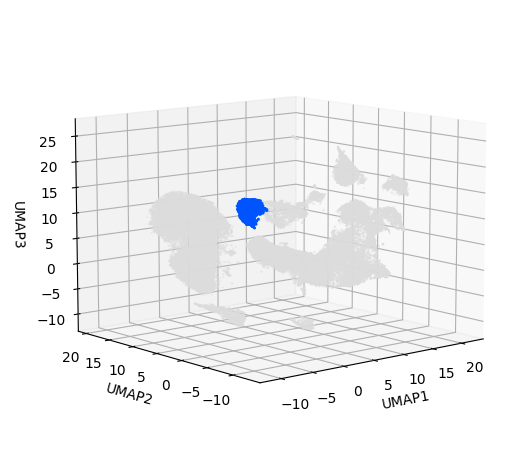

HDBSCAN cluster 8


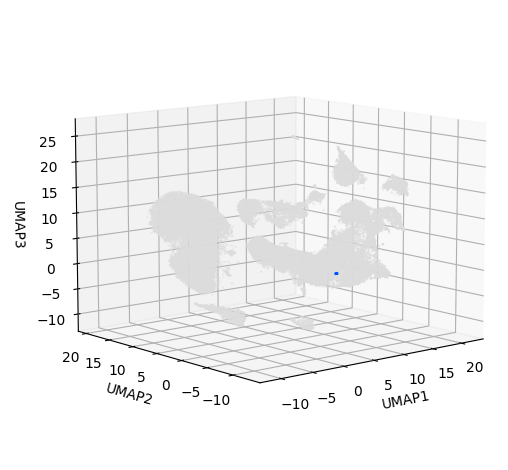

HDBSCAN cluster 9


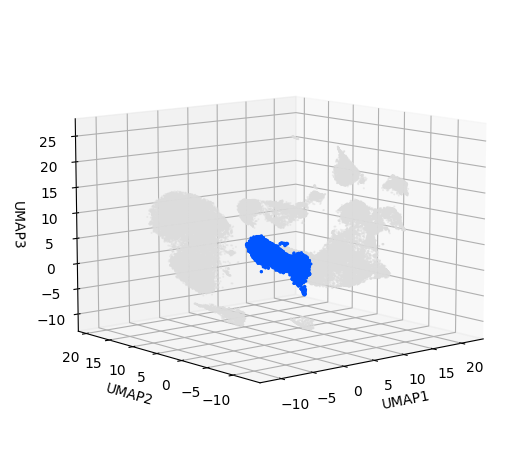

HDBSCAN cluster 10


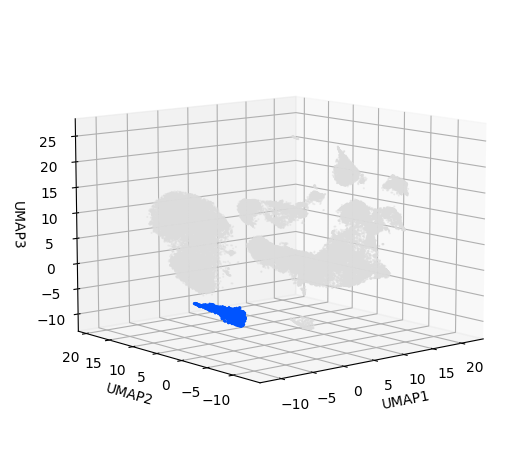

HDBSCAN cluster 11


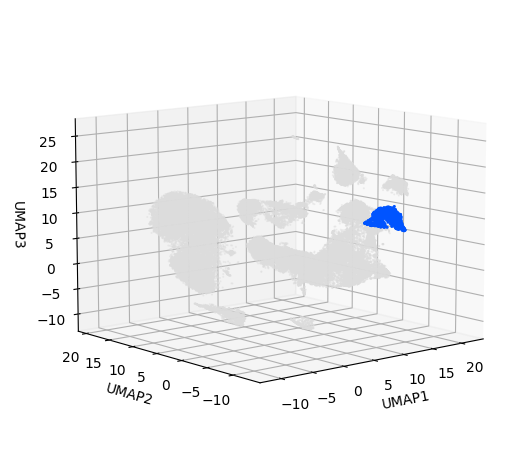

HDBSCAN cluster 12


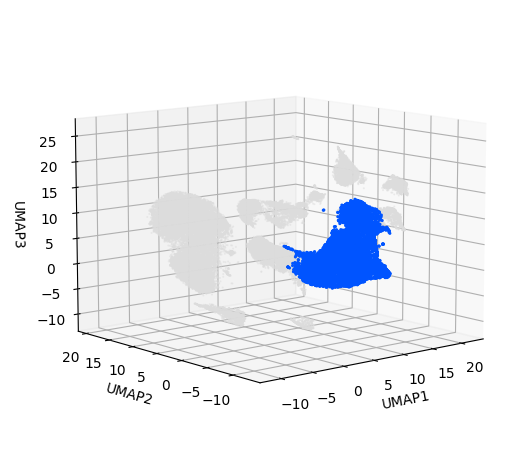

HDBSCAN cluster 13


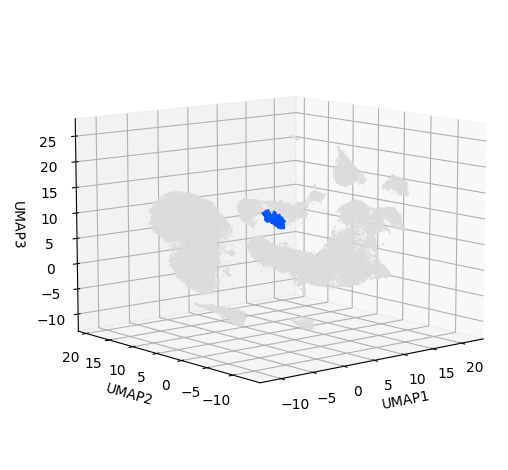

HDBSCAN cluster 14


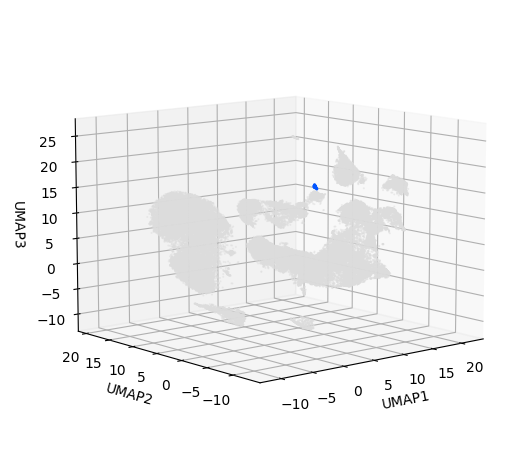

HDBSCAN cluster 15


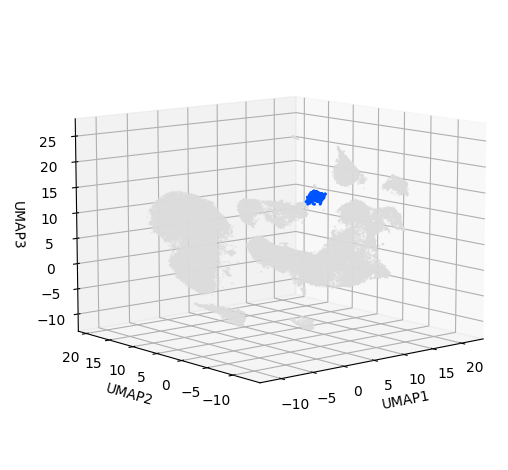

HDBSCAN cluster 16


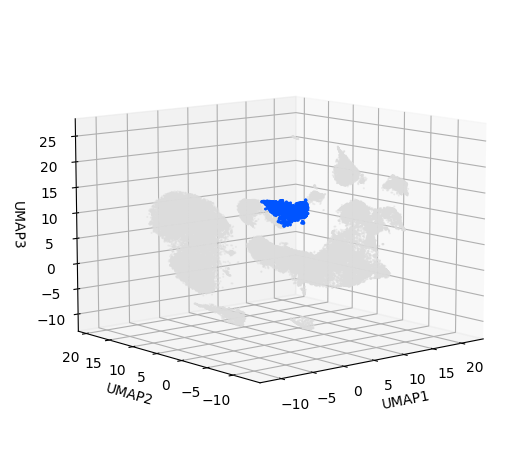

HDBSCAN cluster 17


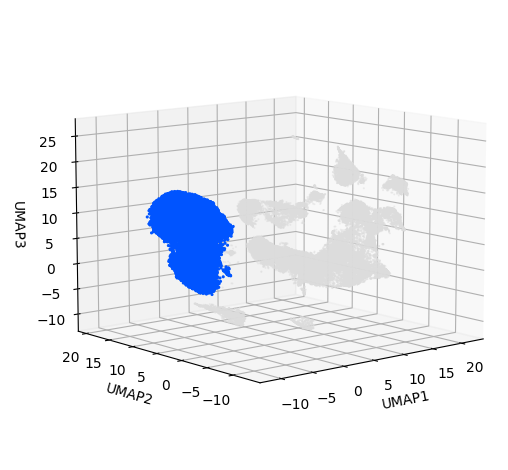

HDBSCAN cluster 18


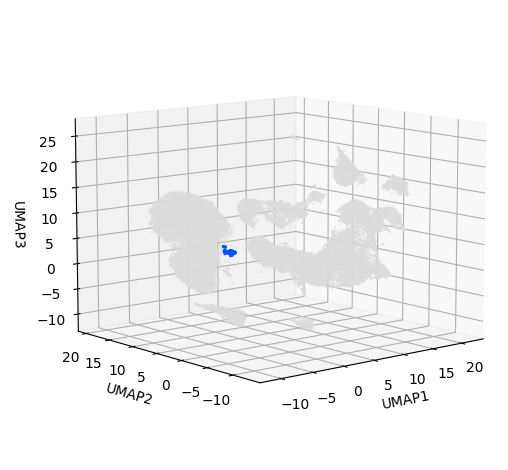

In [3]:
# Plot
for name, col, clustering in zip(
    ['VAE9', 'VAE20', 'Leiden', 'HDBSCAN'],
    ['VAE9_ROT_VIG18', 'VAE20_Leiden', 'cluster_2d', 'cluster'],
    [main, main, leiden, hdbscan]): 
    
    if 'VAE' in name:
        data = pd.read_csv(clustering).sample(frac=0.05)
    else:
        data = pd.read_parquet(clustering).sample(frac=0.05)

    for i in sorted(data[col].unique()):
        if i != -1:
            print(f'{name} cluster {i}')
            
            fig = plt.figure()
            ax = plt.axes(projection='3d', computed_zorder=False)
            if name == 'VAE9':
                ax.view_init(azim=320, elev=10)
            elif name == 'VAE20':
                ax.view_init(azim=360, elev=10)
            else:
                ax.view_init(azim=-130, elev=10)
            
            if name == 'VAE9':
                ax.scatter(
                    data['VAE9_ROT_VIG18_emb_3d_1'],
                    data['VAE9_ROT_VIG18_emb_3d_2'],
                    data['VAE9_ROT_VIG18_emb_3d_3'],
                    c='gainsboro', linewidth=0.0, s=2, alpha=0.5
                )
                ax.scatter(
                    data['VAE9_ROT_VIG18_emb_3d_1'][data[col] == i],
                    data['VAE9_ROT_VIG18_emb_3d_2'][data[col] == i],
                    data['VAE9_ROT_VIG18_emb_3d_3'][data[col] == i],
                    color=(0, 0.33, 1), linewidth=0.0, s=5, alpha=1,
                )
                ax.set_xlabel('UMAP1')
                ax.set_ylabel('UMAP2')
                ax.set_zlabel('UMAP3')
            elif name == 'VAE20':
                ax.scatter(
                    data['VAE20_emb_3d_1'],
                    data['VAE20_emb_3d_2'],
                    data['VAE20_emb_3d_3'],
                    c='gainsboro', linewidth=0.0, s=2, alpha=0.5
                )
                ax.scatter(
                    data['VAE20_emb_3d_1'][data[col] == i],
                    data['VAE20_emb_3d_2'][data[col] == i],
                    data['VAE20_emb_3d_3'][data[col] == i],
                    color=(0, 0.33, 1), linewidth=0.0, s=5, alpha=1,
                )
                ax.set_xlabel('UMAP1')
                ax.set_ylabel('UMAP2')
                ax.set_zlabel('UMAP3')
            else:
                ax.scatter(
                    data['emb1'], data['emb2'], data['emb3'],
                    c='gainsboro', linewidth=0.0, s=2, alpha=0.5
                )
                ax.scatter(
                    data['emb1'][data[col] == i],
                    data['emb2'][data[col] == i],
                    data['emb3'][data[col] == i],
                    color=(0, 0.33, 1), linewidth=0.0, s=5, alpha=1,
                )
                ax.set_xlabel('UMAP1')
                ax.set_ylabel('UMAP2')
                ax.set_zlabel('UMAP3')

            ax.axis('auto')
            ax.tick_params(labelsize=10)
            ax.grid(True)
            plt.tight_layout()
            plt.savefig(os.path.join(out, f'{name}_cluster_{i}.png'), dpi=800)
            plt.show()